# **Dataset Description**
**Customer Segmentation Clustering**

Tujuan dari project ini adalah untuk menemukan pola dari perilaku customer dan dibagi menjadi beberapa cluster untuk bisa menjadi sebuah insight.


**Ket. Dataset**
*   CustomerID = Identitas tiap customer
*   Gender = Jenis Kelamin Customer
*   Age = Umur Customer
*   Annual Income = Income per bulan
*   Spending Score = Score Customer dalam membelanjakan uang mereka (1-100)

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Read Data from G-Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Digital Skola/Dataset/Dataset18_Clustering_Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Analysis**

In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


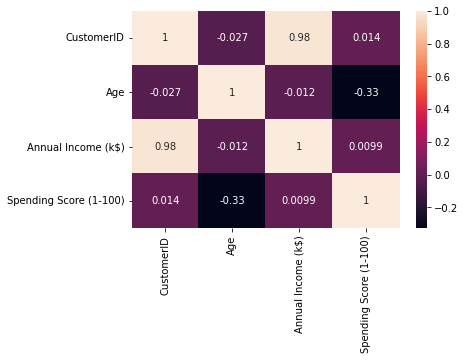

In [ ]:
# Show correlation between feature
sns.heatmap(df.corr(), annot=True)

**Hipotesa Awal**

*   Semakin tua maka spending semakin jarang / Semakin muda, makin sering spending.
*   Semakin tinggi annual income (gaji) semakin sering belanja.



# **Data Visualization**

**Age**

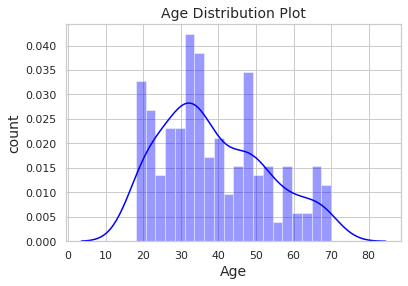

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.distplot(df['Age'], color = "blue", bins=20)
plt.title("Age Distribution Plot", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

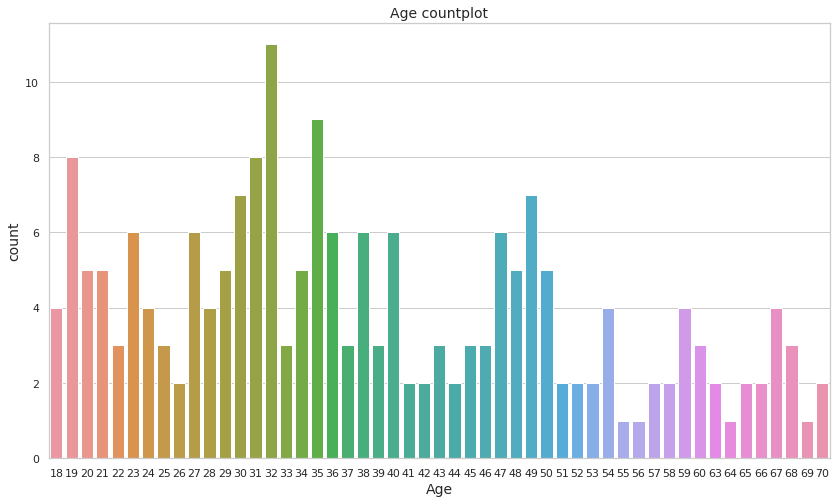

In [ ]:
# Countplot
plt.figure(figsize=(14,8))
sns.countplot(df['Age'])
plt.title("Age countplot", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

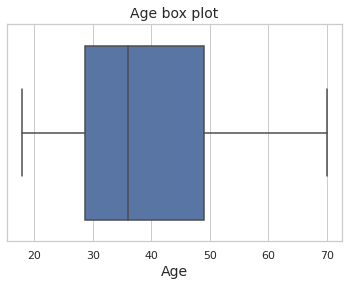

In [ ]:
# Box plot
sns.boxplot(df['Age'])
plt.title("Age box plot",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.show()

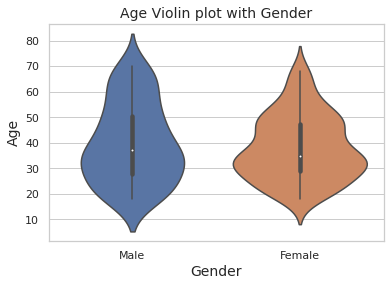

In [ ]:
# Violin Plot
sns.violinplot(y="Age", x ="Gender", data = df)
plt.title("Age Violin plot with Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()



*   Banyak Perempuan yang spending
*   Kebanyakan adalah perempuan usia 30-40



**Annual income**

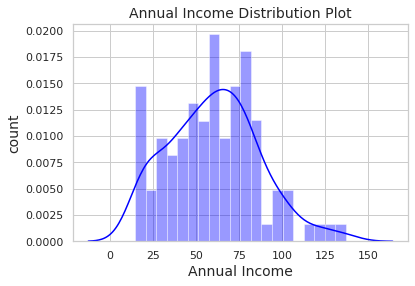

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.distplot(df['Annual Income (k$)'], color = "blue", bins=20)
plt.title("Annual Income Distribution Plot", fontsize=14)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

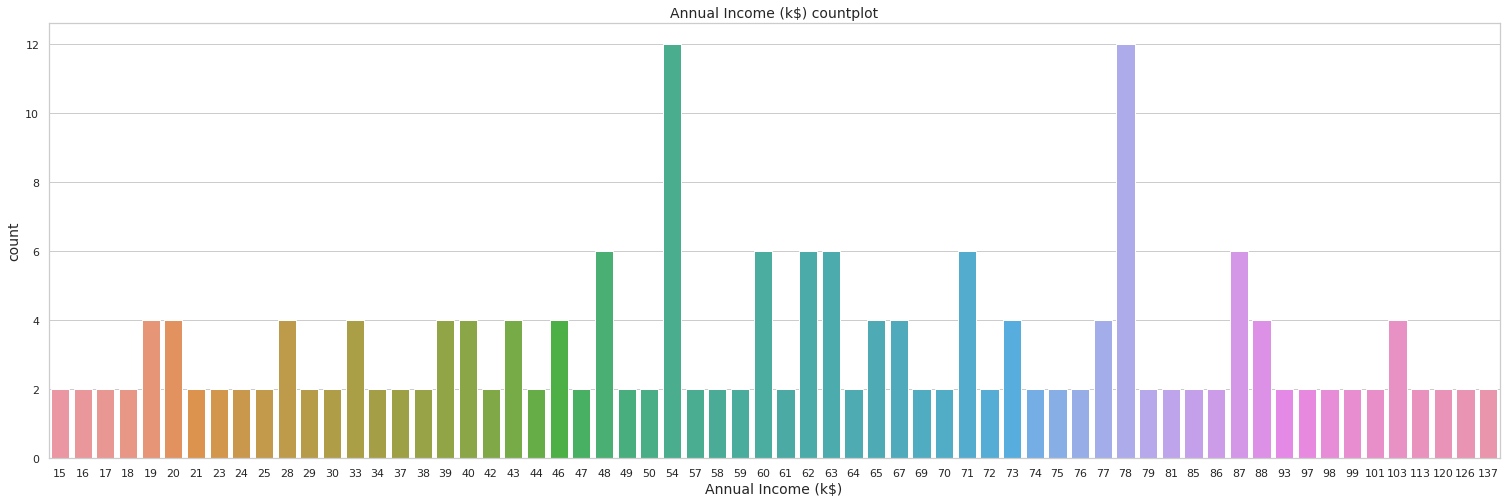

In [ ]:
# Countplot
plt.figure(figsize=(26,8))
sns.countplot(df['Annual Income (k$)'])
plt.title("Annual Income (k$) countplot", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

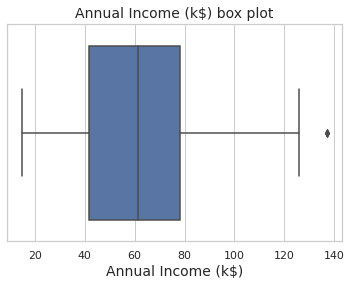

In [ ]:
# Box plot
sns.boxplot(df['Annual Income (k$)'])
plt.title("Annual Income (k$) box plot",fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=14)
plt.show()

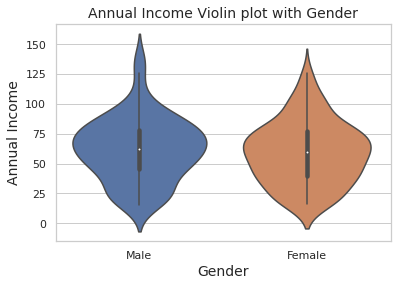

In [ ]:
# Violin Plot
sns.violinplot(y="Annual Income (k$)", x ="Gender", data = df)
plt.title("Annual Income Violin plot with Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Annual Income", fontsize=14)
plt.show()



*   Income lebih dari 130 hanya didapatkan oleh customer laki-laki
*   Rata-rata gaji lebih tinggi customer laki-laki daripada customer perempuan



**Spending Score**

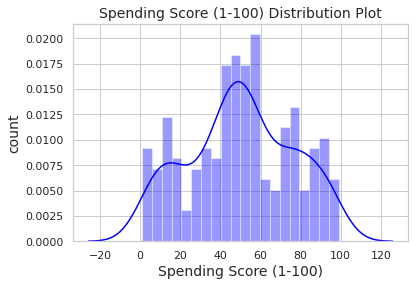

In [ ]:
# Distribution plot
sns.set(style="whitegrid")
sns.distplot(df['Spending Score (1-100)'], color = "blue", bins=20)
plt.title("Spending Score (1-100) Distribution Plot", fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

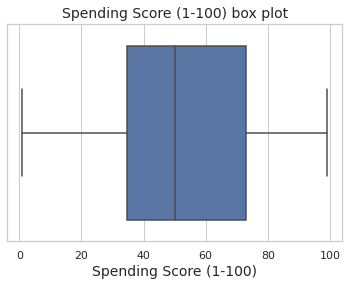

In [ ]:
# Box plot
sns.boxplot(df['Spending Score (1-100)'])
plt.title("Spending Score (1-100) box plot",fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.show()

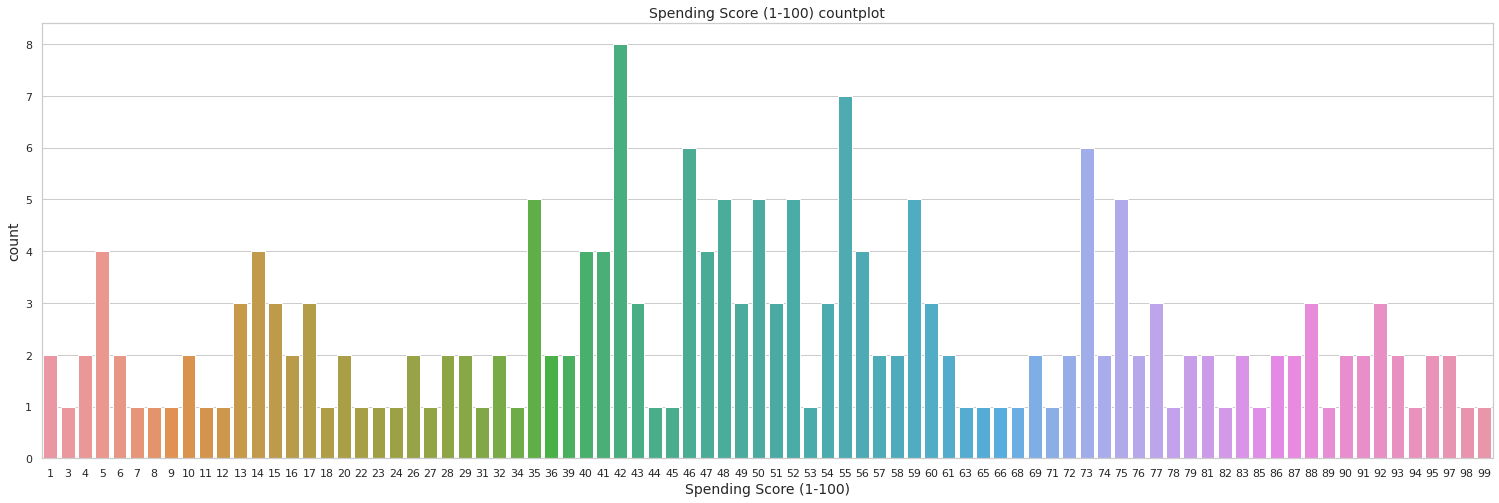

In [ ]:
# Countplot
plt.figure(figsize=(26,8))
sns.countplot(df['Spending Score (1-100)'])
plt.title("Spending Score (1-100) countplot", fontsize=14)
plt.xlabel("Spending Score (1-100)", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.show()

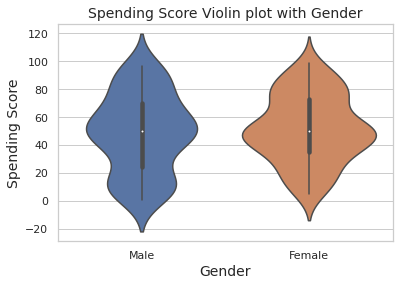

In [ ]:
# Violin Plot
sns.violinplot(y="Spending Score (1-100)", x ="Gender", data = df)
plt.title("Spending Score Violin plot with Gender", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Spending Score", fontsize=14)
plt.show()



*   Perempuan usia 30-40 yang banyak spending dengan rata-rata spending score 40-50
*   Laki-laki usia 25-35 spending scorenya antara 40-60


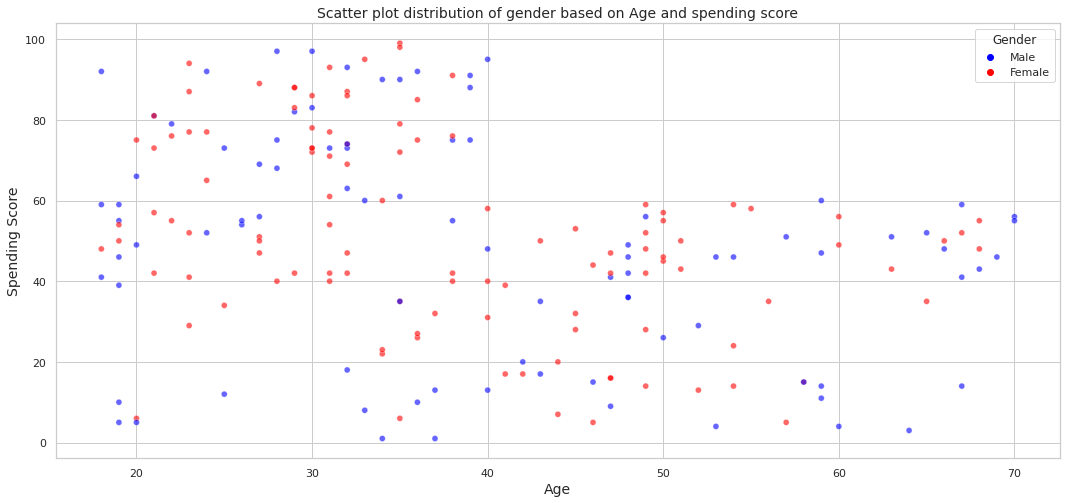

In [ ]:
# Scatter plot distribution of gender based on Age and spending score
plt.figure(figsize=(18,8))
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], hue=df['Gender'], palette=['blue','red'], alpha=0.6)
plt.title("Scatter plot distribution of gender based on Age and spending score",fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Spending Score", fontsize=14)
plt.show()



*   Dibawah usia 40, spending score semakin tinggi
*   Dibawah usia 20 lebih banyak wanita yang sering spending



# **Data Pre-Processing**

In [ ]:
df.set_index('CustomerID',inplace=True)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [ ]:
# Copy Dataset
df_ss = df.copy()

In [ ]:
# Label Encoder utk gender
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_ss['Gender'] = le.fit_transform(df_ss['Gender'])
df_ss.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


# **Clustering Based on 2 Features**

## Age dan Spending Score

**K-Means & K-Means++**

In [ ]:
Age_Spend = df_ss[['Age','Spending Score (1-100)']].iloc[:,:].values
# Age_Spend

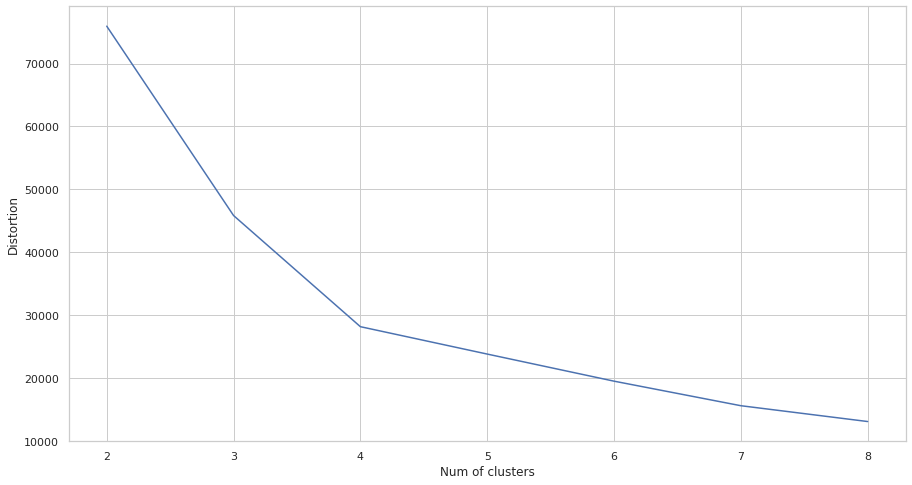

In [ ]:
# Elbow Method
inertia_list=[]

for i in range(2,9):
  kmeans_us = KMeans(n_clusters=i,n_init=10,max_iter=100, random_state=0)
  kmeans_us.fit(Age_Spend)
  inertia_list.append(kmeans_us.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(2,9),inertia_list)
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 17.6 MB/s 


In [ ]:
from sklearn_extra.cluster import KMedoids
labels_kmedoid = KMedoids(n_clusters=4).fit_predict(Age_Spend)
labels_kmedoid

array([1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2,
       0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 1,
       0, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 3, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
labels_kmean_pp = KMeans(init='k-means++',n_clusters=4).fit_predict(Age_Spend)
labels_kmean_pp

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

**hierarchichal**

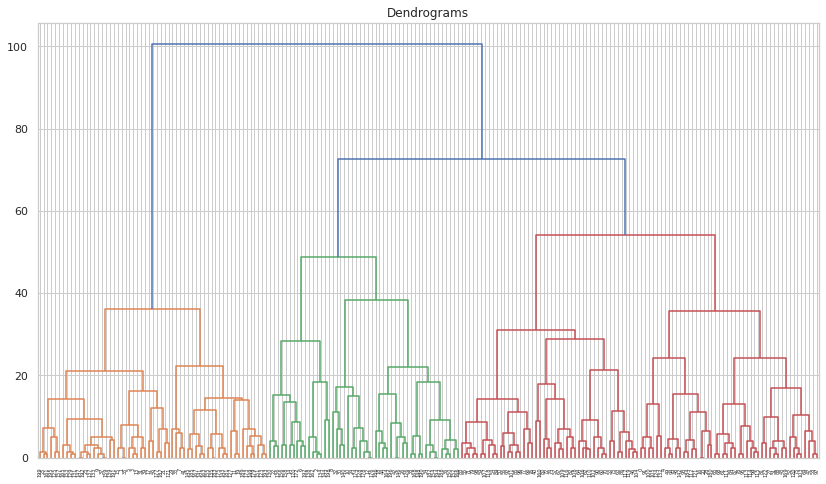

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Age_Spend, method="complete"))

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend1 = shc.dendrogram(shc.linkage(Age_Spend, method="single"))

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend2 = shc.dendrogram(shc.linkage(Age_Spend, method="average"))

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend3 = shc.dendrogram(shc.linkage(Age_Spend, method="ward"))

In [ ]:
labels_cluster_hierarchical_Ward = AgglomerativeClustering(n_clusters=4, linkage="ward").fit_predict(Age_Spend)
labels_cluster_hierarchical_Complete = AgglomerativeClustering(n_clusters=4, linkage="complete").fit_predict(Age_Spend)

In [ ]:
labels_cluster_hierarchical_Ward

In [ ]:
labels_cluster_hierarchical_Complete

# **Compare Result**

**Silhouette Score and Davies Bouldin**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score of K-Medoids: ", silhouette_score(Age_Spend, labels_kmedoid), "\n")
print("Silhouette score of K-Means++: ", silhouette_score(Age_Spend, labels_kmean_pp), "\n")
print("Silhouette score of Agglo Hierarchical Ward: ", silhouette_score(Age_Spend, labels_cluster_hierarchical_Ward), "\n")
print("Silhouette score of Agglo Hierarchical Complete: ", silhouette_score(Age_Spend, labels_cluster_hierarchical_Complete), "\n\n")

print("Davies Bouldin score of K-Medoids: ", davies_bouldin_score(Age_Spend, labels_kmedoid), "\n")
print("Davies Bouldin score of K-Means++: ", davies_bouldin_score(Age_Spend, labels_kmean_pp), "\n")
print("Davies Bouldin score of Agglo Hierarchical Ward: ", davies_bouldin_score(Age_Spend, labels_cluster_hierarchical_Ward), "\n")
print("Davies Bouldin score of Agglo Hierarchical Complete: ", davies_bouldin_score(Age_Spend, labels_cluster_hierarchical_Complete), "\n\n")

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(Age_Spend[labels_kmean_pp == 0,0], Age_Spend[labels_kmean_pp == 0,1], c = 'pink', label="Young, moderate spending customers")
plt.scatter(Age_Spend[labels_kmean_pp == 1,0], Age_Spend[labels_kmean_pp == 1,1], c = 'orange', label='Young, high spending customers')
plt.scatter(Age_Spend[labels_kmean_pp == 2,0], Age_Spend[labels_kmean_pp == 2,1], c = 'green', label='Old, moderate spending customers')
plt.scatter(Age_Spend[labels_kmean_pp == 3,0], Age_Spend[labels_kmean_pp == 3,1], c = 'red', label='Low spending customers')
plt.legend()
plt.title('Customer Segmentation using Age and spending score', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.show()

**Untuk mengembalikan hasil standard scaling ke nilai semula**

inverse_transform(prediction.reshape(-1,1)).reshape(-1)

**Analisa Clustering untuk Annual Income dan Spending Score**

In [ ]:
df_ss.rename(columns={'Annual Income (k$)':'Annual Income'}, inplace=True)

In [ ]:
Ai_Spend = df_ss[['Annual Income','Spending Score (1-100)']].iloc[:,:].values

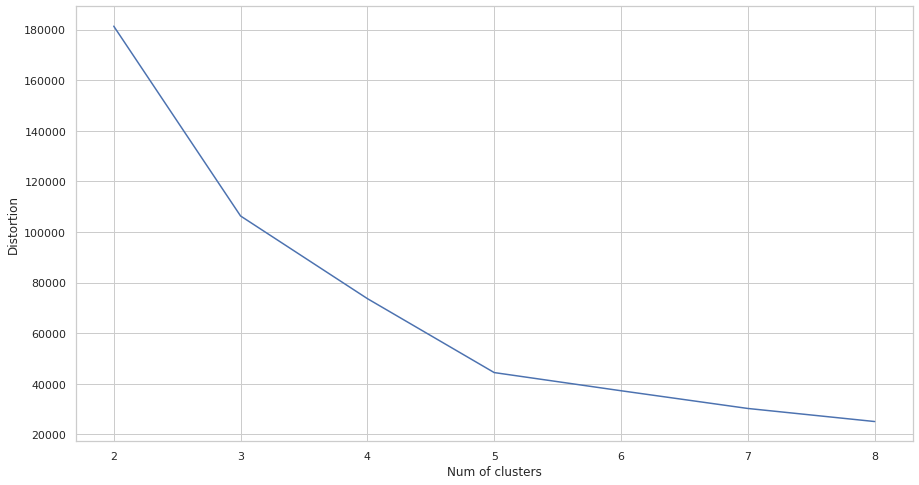

In [ ]:
# Elbow Method
inertia_list=[]

for i in range(2,9):
  kmeans_us = KMeans(n_clusters=i,n_init=10,max_iter=100, random_state=0)
  kmeans_us.fit(Ai_Spend)
  inertia_list.append(kmeans_us.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(2,9),inertia_list)
plt.xlabel("Num of clusters")
plt.ylabel("Distortion")
plt.show()

In [ ]:
from sklearn_extra.cluster import KMedoids
labels_kmedoid = KMedoids(n_clusters=5).fit_predict(Ai_Spend)
labels_kmedoid

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [ ]:
labels_kmean_pp = KMeans(init='k-means++',n_clusters=5).fit_predict(Ai_Spend)
labels_kmean_pp

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

**hierarchichal**

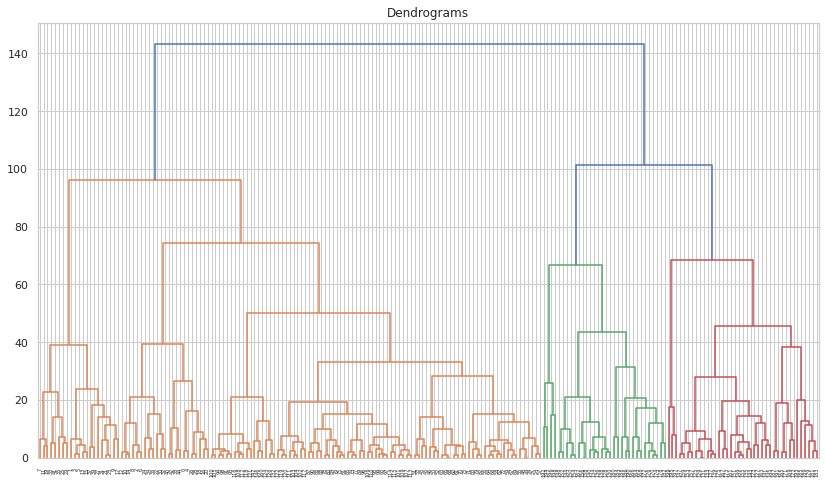

In [ ]:
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Ai_Spend, method="complete"))

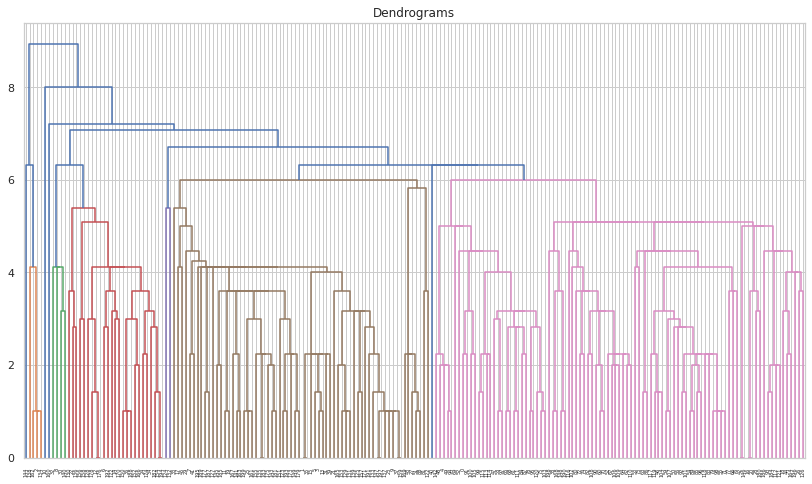

In [ ]:
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Ai_Spend, method="single"))

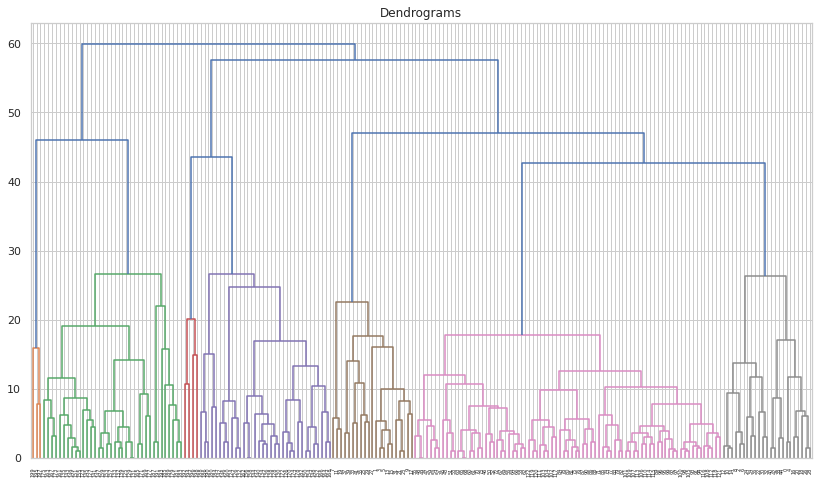

In [ ]:
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Ai_Spend, method="average"))

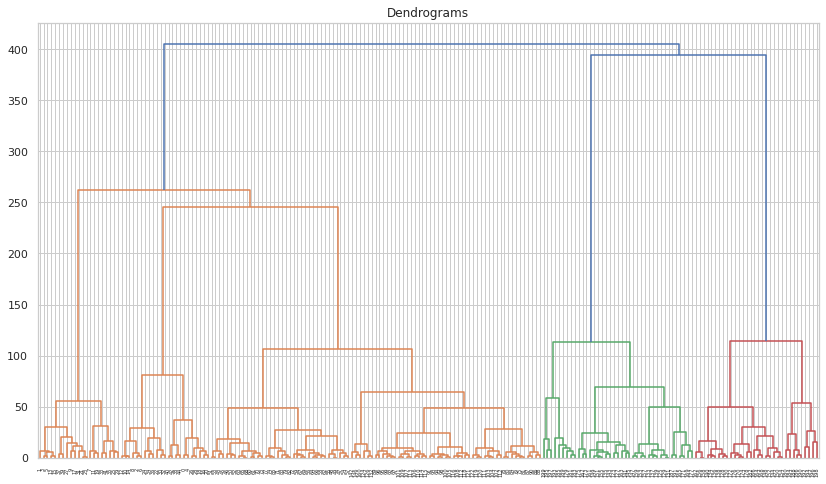

In [ ]:
pyplot.figure(figsize=(14,8))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Ai_Spend, method="ward"))

# **Compare and Result**

**Silhouette Score and Davies Bouldin**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print("Silhouette score of K-Medoids: ", silhouette_score(Ai_Spend, labels_kmedoid), "\n")
print("Silhouette score of K-Means++: ", silhouette_score(Ai_Spend, labels_kmean_pp), "\n")
print("Silhouette score of Agglo Hierarchical Ward: ", silhouette_score(Ai_Spend, labels_cluster_hierarchical_Ward), "\n")
print("Silhouette score of Agglo Hierarchical Complete: ", silhouette_score(Ai_Spend, labels_cluster_hierarchical_Complete), "\n\n")

print("Davies Bouldin score of K-Medoids: ", davies_bouldin_score(Ai_Spend, labels_kmedoid), "\n")
print("Davies Bouldin score of K-Means++: ", davies_bouldin_score(Ai_Spend, labels_kmean_pp), "\n")
print("Davies Bouldin score of Agglo Hierarchical Ward: ", davies_bouldin_score(Ai_Spend, labels_cluster_hierarchical_Ward), "\n")
print("Davies Bouldin score of Agglo Hierarchical Complete: ", davies_bouldin_score(Ai_Spend, labels_cluster_hierarchical_Complete), "\n\n")

Silhouette score of K-Medoids:  0.4468315848864226 

Silhouette score of K-Means++:  0.553931997444648 

Silhouette score of Agglo Hierarchical Ward:  0.11290408785895652 

Silhouette score of Agglo Hierarchical Complete:  0.08457182831028265 


Davies Bouldin score of K-Medoids:  0.7634480661738675 

Davies Bouldin score of K-Means++:  0.5725628995597086 

Davies Bouldin score of Agglo Hierarchical Ward:  2.8976457281179484 

Davies Bouldin score of Agglo Hierarchical Complete:  9.979672192422104 




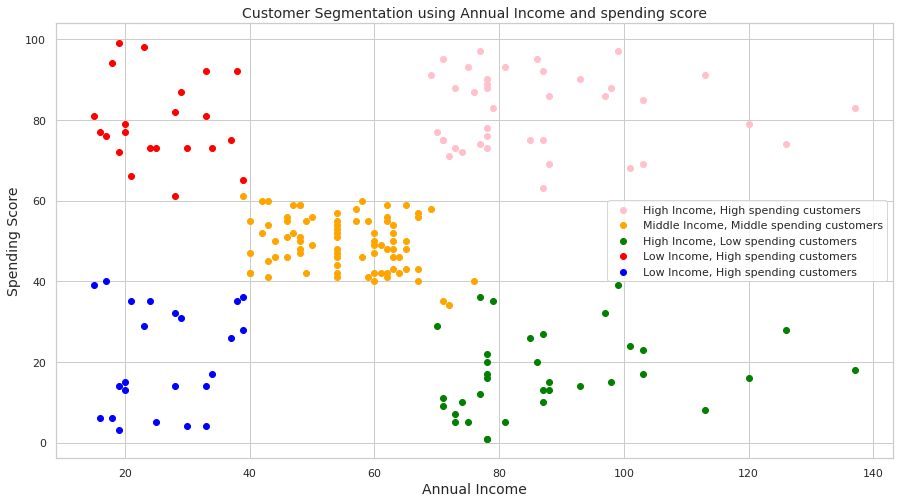

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(Ai_Spend[labels_kmean_pp == 0,0], Ai_Spend[labels_kmean_pp == 0,1], c = 'pink', label="High Income, High spending customers")
plt.scatter(Ai_Spend[labels_kmean_pp == 1,0], Ai_Spend[labels_kmean_pp == 1,1], c = 'orange', label='Middle Income, Middle spending customers')
plt.scatter(Ai_Spend[labels_kmean_pp == 2,0], Ai_Spend[labels_kmean_pp == 2,1], c = 'green', label='High Income, Low spending customers')
plt.scatter(Ai_Spend[labels_kmean_pp == 3,0], Ai_Spend[labels_kmean_pp == 3,1], c = 'red', label='Low Income, High spending customers')
plt.scatter(Ai_Spend[labels_kmean_pp == 4,0], Ai_Spend[labels_kmean_pp == 4,1], c = 'blue', label='Low Income, High spending customers')
plt.legend()
plt.title('Customer Segmentation using Annual Income and spending score', fontsize=14)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Spending Score', fontsize=14)
plt.show()